# Song data to database

## Imports

In [1]:
import sqlite3

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
full_data = pd.read_csv('data/spotify_data/spotify_genre.csv')

In [3]:
full_data.head()

,track_id,track_name,album_name,artist_name,genres,popularity,danceability,loudness,speechiness,acousticness,liveness,instrumentalness,energy,valence,mode,key,tempo,time_signature,length,cluster
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,After Hours,The Weeknd,cheerful,1.000000,0.446559,0.743290,0.092520,0.001353,0.074479,0.000105,0.725596,0.316543,1.0,0.090909,0.725315,1.0,0.242947,0
1,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Fine Line,Harry Styles,cheerful,0.977011,0.496340,0.863852,0.057858,0.126285,0.375460,0.000000,0.822312,0.556560,1.0,0.000000,0.185351,1.0,0.195212,0
2,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),One Kiss (with Dua Lipa),Calvin Harris,sombre,0.965517,0.852123,0.931577,0.223352,0.038187,0.064294,0.000024,0.874044,0.594231,0.0,0.818182,0.389611,1.0,0.270090,1
3,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,Unorthodox Jukebox,Bruno Mars,cheerful,0.954023,0.756955,0.866928,0.048997,0.050625,0.343558,0.000000,0.689609,0.890216,1.0,0.454545,0.532431,1.0,0.304242,0
4,7qiZfU4dY1lWllzX7mPBI3,Shape of You,÷ (Deluxe),Ed Sheeran,sombre,0.954023,0.901903,0.935561,0.145687,0.602009,0.078650,0.000000,0.637877,0.959100,0.0,0.090909,0.189543,1.0,0.304673,1


In [4]:
full_data.columns

Index(['track_id', 'track_name', 'album_name', 'artist_name', 'genres',
       'popularity', 'danceability', 'loudness', 'speechiness', 'acousticness',
       'liveness', 'instrumentalness', 'energy', 'valence', 'mode', 'key',
       'tempo', 'time_signature', 'length', 'cluster'],
      dtype='object')

## Feature Selection

In [5]:
song_data = full_data[['track_id', 'track_name', 'artist_name', 'genres', 'popularity']]

In [6]:
song_data.head()

,track_id,track_name,artist_name,genres,popularity
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,cheerful,1.000000
1,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Harry Styles,cheerful,0.977011
2,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),Calvin Harris,sombre,0.965517
3,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,Bruno Mars,cheerful,0.954023
4,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,sombre,0.954023


## Feature Analyzing

In [7]:
song_data['genres'].value_counts()

cheerful    154
sombre       80
Name: genres, dtype: int64

Text(0, 0.5, 'count')

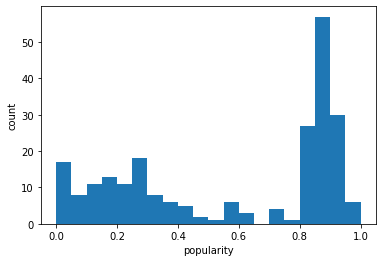

In [8]:
plt.hist(song_data['popularity'], bins=20)
plt.xlabel('popularity')
plt.ylabel('count')

## Music Player

In [9]:
Play = song_data[song_data['genres'] =='sombre']

Play = Play.sort_values(by="popularity", ascending=False)

Play = Play[['track_id','track_name']][:10].reset_index(drop=True)

display(Play)

,track_id,track_name
0,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa)
1,7JJmb5XwzOO8jgpou264Ml,There's Nothing Holdin' Me Back
2,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,1mea3bSkSGXuIRvnydlB5b,Viva La Vida
4,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean)
5,2qxmye6gAegTMjLKEBoR3d,Let Me Down Slowly
6,3GVkPk8mqxz0itaAriG1L7,Everybody Dies In Their Nightmares
7,3ZCTVFBt2Brf31RLEnCkWJ,everything i wanted
8,6RUKPb4LETWmmr3iAEQktW,Something Just Like This
9,7m9OqQk4RVRkw9JJdeAw96,Jocelyn Flores


In [10]:
Play = song_data[song_data['genres'] =='cheerful']

Play = Play.sort_values(by="popularity", ascending=False)

Play = Play[['track_id','track_name']][:10].reset_index(drop=True)

display(Play)

,track_id,track_name
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights
1,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar
2,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven
3,4RVwu0g32PAqgUiJoXsdF8,Happier Than Ever
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph
5,1zi7xx7UVEFkmKfv06H8x0,One Dance
6,0ct6r3EGTcMLPtrXHDvVjc,The Nights
7,6qn9YLKt13AGvpq9jfO8py,We Found Love
8,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me
9,75JFxkI2RXiU7L9VXzMkle,The Scientist


## Storing the data to database

In [11]:
conn = sqlite3.connect('songs.sqlite')

In [12]:
table_name = 'songs'

In [13]:
query = f'Create table if not Exists {table_name} (track_id TEXT, track_name TEXT, artist_name TEXT, genres TEXT, popularity REAL)'

In [14]:
conn.execute(query)

In [15]:
song_data.to_sql(table_name, conn, if_exists='replace', index=False)

234

## Retrieve dataframe from the SQLite table

In [16]:
data = pd.read_sql("select * from songs", conn)

In [17]:
data.head()

,track_id,track_name,artist_name,genres,popularity
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,cheerful,1.000000
1,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Harry Styles,cheerful,0.977011
2,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),Calvin Harris,sombre,0.965517
3,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,Bruno Mars,cheerful,0.954023
4,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,sombre,0.954023


In [18]:
conn.commit()
conn.close()

In [19]:
data.to_csv('data/spotify_data/songs.csv', sep=',', index=False)

`Stored the data in the database`